In [1]:
from astropy.modeling import projections

def create_projection(prj_code, *args):
    """ Given a projection code create and return the projection object"""
    # The projections code is in astropy.modeling.projections
    # We need to import this module first
    
    # Projection codes are 3 character strings.
    # The available codes are in a list called ``projcodes``.
    # Raise an error if the passed in prj_code is not available
    
    # Create a projection object using Pix2Sky_<prj_code>
    s = 'Pix2Sky_' + prj_code
    prj_class = getattr(projections, s)
    projection = prj_class(*args)
    
    return projection

In [2]:
from gwcs import coordinate_frames as cf, wcs
from astropy import units as u
from astropy import coordinates as coord

def wrap_projection(projection):
    """ Given a projection object wrap it in a GWCS object. """
    # Create a coordinate frame object associated with the image.
    det = cf.Frame2D(name='image_frame', unit=(u.deg, u.deg))

    # Create a coordinate frame object associated with the sky.
    icrs = coord.ICRS()
    world = cf.CelestialFrame(name='sky_frame', reference_frame=icrs)
    
    # Create a list of tuples of size 2 (frame, transform)
    pipeline = [(det, projection),
                (world, None)
               ]
    # Wrap the list in a WCS object which matplotlib understands
    gw = wcs.WCS(pipeline)
    return gw

In [3]:
from matplotlib import pyplot as plt

def view_projection(proj):
    """ Given a projection object make a plot on a gird."""
    ax = plt.subplot(projection=proj)
    ax.grid(color='blue', ls='solid')
    ax.coords[0].set_format_unit(u.degree)
    ax.set_xlim(-180, 180)
    ax.set_ylim(-90, 120)
    ax.coords[0].coord_wrap = 180
    ax.coords[0].set_ticks(spacing=15*u.deg, color='k')
    ax.coords[1].set_ticks(spacing=15*u.deg, color='k')

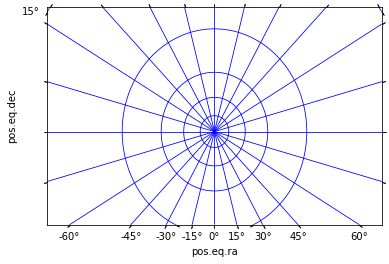

In [4]:
projection = create_projection("TAN")
gw = wrap_projection(projection)
view_projection(gw)

The Mollweide projection is an equal-area, map projection generally used for global maps of the world or night sky. The projection trades accuracy of angle and shape for accuracy of proportions in area, and as such is used where that property is needed, such as maps depicting global distributions.

The code in astropy for the Molwede projection is `MOL`.

Use the functions to display a grid using the Molwede projection.

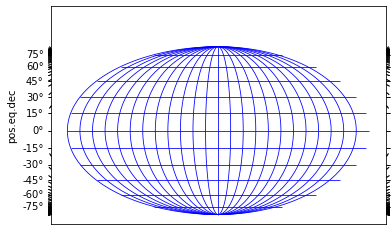

In [5]:
projection = create_projection("MOL")
gw = wrap_projection(projection)
view_projection(gw)

The Bonne projection is an equal-area map projection. The Bonne projection maintains accurate shapes of areas along the central meridian and the standard parallel, but progressively distorts away from those regions. Thus, it best maps "t"-shaped regions. It has been used extensively for maps of Europe and Asia.

The code in astropy for the Bonne projection is `BON`.

Use the functions to display a grid using the Bonne projection.

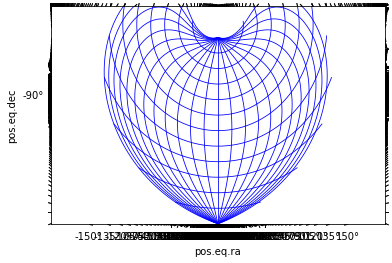

In [6]:
projection = create_projection("BON", 45)
gw = wrap_projection(projection)
view_projection(gw)